In [116]:
# Initialize Otter
import otter
grader = otter.Notebook("lab02A.ipynb")

## Lab 2: Pandas Overview I

To receive credit for a lab, answer all questions correctly and submit before the deadline.

**The on-time deadline is Tuesday, September 5, 11:59 PM. Please read the syllabus for the grace period policy. No late submissions beyond the grace period will be accepted.**

### Lab Walk-Through
In addition to the lab notebook, we have also released a prerecorded walk-through video of the lab. We encourage you to reference this video as you work through the lab. Run the cell below to display the video.
<br>
**Note:** This video is recorded in Spring 2022. There may be slight inconsistencies between the version you are viewing vesus the version used in the recording, but content is identical.

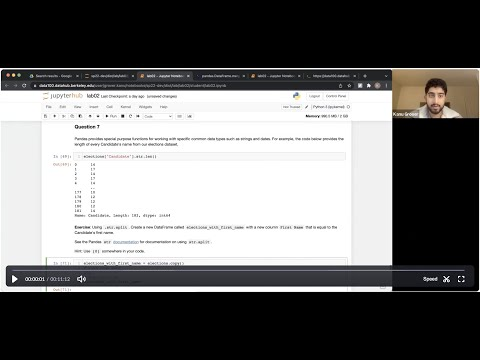

In [117]:
from IPython.display import YouTubeVideo
YouTubeVideo("MLUNk_D7KW0", list = 'PLQCcNQgUcDfoWO3WVtznI7CBJmtNUqbAN', listType = 'playlist')

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below. (That's a good way to learn your classmates' names.)

**Collaborators**: *list collaborators here*

---
[Pandas](https://pandas.pydata.org/) is one of the most widely used Python libraries in data science. In this lab, you will review commonly used data-wrangling operations/tools in `Pandas`. We aim to give you familiarity with:

* Creating DataFrames,
* Slicing DataFrames (i.e., selecting rows and columns)
* Filtering data (using boolean arrays)

In this lab, you are going to use several pandas methods. Reminder from lecture that you may press `shift+tab` on method parameters to see the documentation for that method. For example, if you were using the `drop` method in pandas, you could press `shift+tab` to see what `drop` is expecting.

`Pandas` is very similar to the `datascience` library that you saw in Data 8. This [conversion notebook](https://data100.datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2FDS-100%2Fsu23-materials&branch=main&urlpath=lab%2Ftree%2Fsu23-materials%2Flec%2Flec02%2Fdata8_translation_examples.ipynb) may serve as a useful guide!

This lab expects that you have watched the `Pandas I` and `II` lectures. If you have not, this lab will probably take a very long time.

**Note**: The Pandas interface is notoriously confusing for beginners, and the documentation is not consistently great. Throughout the semester, you will have to search through Pandas documentation and experiment, but remember it is part of the learning experience and will help shape you as a data scientist!

**This assignment seems long, but rest assured that a large part of it is a tutorial (i.e., we will guide you through many aspects of using `Pandas` in the most efficient way possible!).**

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
%matplotlib inline

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### **REVIEW:** Creating DataFrames & Basic Manipulations

Recall that a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) is a table in which each column has a specific data type; there is an index over the columns (typically string labels) and an index over the rows (typically ordinal numbers).

Usually, you'll create `DataFrames` by using a function like `pd.read_csv`. However, in this section, we'll discuss how to create them from scratch.

The [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for the pandas `DataFrame` class provides several constructors for the `DataFrame` class.

**Syntax 1:** You can create a `DataFrame` by specifying the columns and values using a dictionary, as shown below. 

The keys of the dictionary are the column names, and the values of the dictionary are lists containing the row entries.

In [119]:
fruit_info = pd.DataFrame(
    data = {'fruit': ['apple', 'orange', 'banana', 'raspberry'],
          'color': ['red', 'orange', 'yellow', 'pink'],
          'price': [1.0, 0.75, 0.35, 0.05]
          })
fruit_info

fruit   color  price
0      apple     red   1.00
1     orange  orange   0.75
2     banana  yellow   0.35
3  raspberry    pink   0.05

**Syntax 2:** You can also define a `DataFrame` by specifying the rows as shown below. 

Each row corresponds to a distinct tuple, and the columns are specified separately.

In [120]:
fruit_info2 = pd.DataFrame(
    [("red", "apple", 1.0), ("orange", "orange", 0.75), ("yellow", "banana", 0.35),
     ("pink", "raspberry", 0.05)], 
    columns = ["color", "fruit", "price"])
fruit_info2

color      fruit  price
0     red      apple   1.00
1  orange     orange   0.75
2  yellow     banana   0.35
3    pink  raspberry   0.05

You can obtain the dimensions of a `DataFrame` by using the shape attribute `DataFrame.shape`.

In [121]:
fruit_info.shape

(4, 3)

You can also convert the entire `DataFrame` into a two-dimensional `NumPy` array. Remeber that a `Numpy` array can hold homogenous data wheras a `DataFrame` can contain heterogeneous data. 

In [122]:
numbers = pd.DataFrame({"A":[1, 2, 3], "B":[0, 1, 1]})
numpy_numbers = numbers.to_numpy()

print(type(numpy_numbers))
print(numpy_numbers)

<class 'numpy.ndarray'>
[[1 0]
 [2 1]
 [3 1]]


The `values` attribute returns the content of the `DataFrame` in the form of a list of lists.

In [123]:
fruit_info.values

array([['apple', 'red', 1.0],
       ['orange', 'orange', 0.75],
       ['banana', 'yellow', 0.35],
       ['raspberry', 'pink', 0.05]], dtype=object)

There are other constructors but we do not discuss them here.

### **REVIEW:** Selecting Rows and Columns in Pandas

As you've seen in lecture and discussion, there are two verbose operators in Python for selecting rows: `loc` and `iloc`. Let's review them briefly.

**Approach 1:** `loc`

The first of the two verbose operators is `loc`, which takes two arguments. The first is one or more **row labels**, the second is one or more **column labels** - both of which are displayed in bold to the left of each of the rows and above each of the columns, respectively. These are not the same as positional indices, which are used for indexing Python lists or `NumPy` arrays!

The desired rows or columns can be provided individually, in slice notation, or as a list. Some examples are given below.

Note that **slicing in `loc` is inclusive** on the provided labels.

In [124]:
# Get rows 0 through 2 (inclusive) with labels 'fruit' through 'price' (which would include the color column that is in between both labels)
fruit_info.loc[0:2, 'fruit':'price']

fruit   color  price
0   apple     red   1.00
1  orange  orange   0.75
2  banana  yellow   0.35

In [125]:
# Get rows 0 through 2 (inclusive) and columns 'fruit' and 'price'. 
# Note the difference in notation and result from the previous example.
fruit_info.loc[0:2, ['fruit', 'price']]

fruit  price
0   apple   1.00
1  orange   0.75
2  banana   0.35

In [126]:
# Get rows 0 and 2 and columns fruit and price. 
fruit_info.loc[[0, 2], ['fruit', 'price']]

fruit  price
0   apple   1.00
2  banana   0.35

In [127]:
# Get rows 0 and 2 and column fruit
fruit_info.loc[[0, 2], ['fruit']]

fruit
0   apple
2  banana

Note that if we request a single column but don't enclose it in a list, the return type of the `loc` operator is a `Series` rather than a `DataFrame`. 

In [128]:
# Get rows 0 and 2 and column fruit, returning the result as a Series
fruit_info.loc[[0, 2], 'fruit']

0     apple
2    banana
Name: fruit, dtype: object

If we provide only one argument to `loc`, it uses the provided argument to select rows, and returns all columns.

In [129]:
fruit_info.loc[0:1]

fruit   color  price
0   apple     red   1.00
1  orange  orange   0.75

Note that if you try to access columns without providing rows, `loc` will crash. 

In [130]:
# Uncomment, this code will crash
#fruit_info.loc[["fruit", "price"]]

# Uncomment, this code works fine: 
#fruit_info.loc[:, ["fruit", "price"]]

<br/>

**Approach 2:** `iloc`

`iloc` is very similar to `loc` except that its arguments are **row numbers** and **column numbers**, rather than row and column labels. A useful mnemonic is that the `i` stands for "integer". This is quite similar to indexing into a Python `list` or `NumPy` array.

In addition, **slicing for `iloc` is exclusive** on the provided integer indices. Some examples are given below:

In [131]:
# Get rows 0 through 3 (exclusive) and columns 0 through 3 (exclusive)
fruit_info.iloc[0:3, 0:3]

fruit   color  price
0   apple     red   1.00
1  orange  orange   0.75
2  banana  yellow   0.35

In [132]:
# Get rows 0 through 3 (exclusive) and columns 0 and 2.
fruit_info.iloc[0:3, [0, 2]]

fruit  price
0   apple   1.00
1  orange   0.75
2  banana   0.35

In [133]:
# Get rows 0 and 2 and columns 0 and 2.
fruit_info.iloc[[0, 2], [0, 2]]

fruit  price
0   apple   1.00
2  banana   0.35

In [134]:
# Get rows 0 and 2 and column fruit
fruit_info.iloc[[0, 2], [0]]

fruit
0   apple
2  banana

In [135]:
# Get rows 0 and 2 and column fruit
fruit_info.iloc[[0, 2], 0]

0     apple
2    banana
Name: fruit, dtype: object

Note that in these `loc` and `iloc` examples above, the row **label** and row **number** were always the same.

Let's see an example where they are different. If we sort our fruits by price, we get:

In [136]:
fruit_info_sorted = fruit_info.sort_values("price")
fruit_info_sorted

fruit   color  price
3  raspberry    pink   0.05
2     banana  yellow   0.35
1     orange  orange   0.75
0      apple     red   1.00

After sorting, note how row number 0 now has index label 3, row number 1 now has index label 2, etc. These indices are the arbitrary numerical indices generated when we created the `DataFrame`. For example, `banana` was originally in row 2, and so it has row label 2. Note the distinction between the index _label_, and the actual index _position_.

If we request the rows in positions 0 and 2 using `iloc`, we're indexing using the row NUMBERS, not labels. 

In [137]:
fruit_info_sorted.iloc[[0, 2], 0]

3    raspberry
1       orange
Name: fruit, dtype: object

Lastly, similar to `loc`, the second argument to `iloc` is optional. That is, if you provide only one argument to `iloc`, it treats the argument you provide as a set of desired row numbers, not column numbers.

In [138]:
fruit_info_sorted.iloc[[0, 2]]

fruit   color  price
3  raspberry    pink   0.05
1     orange  orange   0.75

**Approach 3:** `[]` Notation for Accessing Rows and Columns

`Pandas` also supports the `[]` operator. It's similar to `loc` in that it lets you access rows and columns by their name.

However, unlike `loc`, which takes row names and also optionally column names, `[]` is more flexible. If you provide it only row names, it'll give you rows (same behavior as `loc`), and if you provide it with only column names, it'll give you columns (whereas `loc` will crash).

Some examples:

In [139]:
fruit_info[0:2]

fruit   color  price
0   apple     red   1.00
1  orange  orange   0.75

In [140]:
# Here we're providing a list of fruits as single argument to []
fruit_info[["fruit", "color", "price"]]

fruit   color  price
0      apple     red   1.00
1     orange  orange   0.75
2     banana  yellow   0.35
3  raspberry    pink   0.05

Note that slicing notation is not supported for columns if you use `[]` notation. Use `loc` instead.

In [141]:
# Uncomment and this code crashes
#fruit_info["fruit":"price"]

# Uncomment and this works fine
#fruit_info.loc[:, "fruit":"price"]

`[]` and `loc` are quite similar. For example, the following two pieces of code are functionally equivalent for selecting the fruit and price columns.

1. `fruit_info[["fruit", "price"]]` 
2. `fruit_info.loc[:, ["fruit", "price"]]`.

Because it yields more concise code, you'll find that our code and your code both tend to feature `[]`. However, there are some subtle pitfalls of using `[]`. If you're ever having performance issues, weird behavior, or you see a `SettingWithCopyWarning` in pandas, switch from `[]` to `loc`, and this may help.

To avoid getting too bogged down in indexing syntax, we'll avoid a more thorough discussion of `[]` and `loc`. We may return to this at a later point in the course.

For more on `[]` vs. `loc`, you may optionally try reading:
1. https://stackoverflow.com/questions/48409128/what-is-the-difference-between-using-loc-and-using-just-square-brackets-to-filte
2. https://stackoverflow.com/questions/38886080/python-pandas-series-why-use-loc/65875826#65875826
3. https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas/53954986#53954986

Now that we've reviewed basic indexing, let's discuss how we can modify dataframes. We'll do this via a series of exercises. 

---
### Question 1a

For a DataFrame `d`, you can add a column with `d['new column name'] = ...` and assign a `list` or `array` of values to the column. Add a column of integers containing 1, 2, 3, and 4 called `rank1` to the `fruit_info` table, which expresses **your personal preference** about the taste ordering for each fruit (1 is tastiest; 4 is least tasty). There is no right order, it is completely your choice of rankings.


In [142]:
d = pd.DataFrame([1,2,3,4], columns = ["ranking"])
fruit_info["rank1"] = d["ranking"]
fruit_info

fruit   color  price  rank1
0      apple     red   1.00      1
1     orange  orange   0.75      2
2     banana  yellow   0.35      3
3  raspberry    pink   0.05      4

In [143]:
grader.check("q1a")

q1a results: All test cases passed!

---
### Question 1b

You can also add a column to `d` with `d.loc[:, 'new column name'] = ...`. As above, the first parameter is for the rows, and the second is for columns. The `:` means changing all rows, and the `'new column name'` indicates the name of the column you are modifying (or, in this case, adding). 

Add a column called `rank2` to the `fruit_info` table, which contains the same values in the same order as the `rank1` column.


In [144]:
d.loc[:, 'ranking2'] = d["ranking"]
fruit_info["rank2"] = d["ranking2"]
fruit_info

fruit   color  price  rank1  rank2
0      apple     red   1.00      1      1
1     orange  orange   0.75      2      2
2     banana  yellow   0.35      3      3
3  raspberry    pink   0.05      4      4

In [145]:
grader.check("q1b")

q1b results: All test cases passed!

---
### Question 2

Use the `.drop()` method to [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) both the `rank1` and `rank2` columns you created. Make sure to use the `axis` parameter correctly. Note that `drop` does not change a table but instead returns a new table with fewer columns or rows unless you set the optional `inplace` argument.

**Hint:** Look through the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) to see how you can drop multiple columns of a `DataFrame` at once using a list of column names.


In [146]:
fruit_info_original = fruit_info.drop(["rank1", "rank2"], axis = "columns")

fruit_info_original

fruit   color  price
0      apple     red   1.00
1     orange  orange   0.75
2     banana  yellow   0.35
3  raspberry    pink   0.05

In [147]:
grader.check("q2")

q2 results: All test cases passed!

---
### Question 3

Use the `.rename()` method to rename the columns of `fruit_info_original` so they begin with capital letters. Set this new `DataFrame` to `fruit_info_caps`. For an example of how to use rename, see this linked [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html).

In [148]:
fruit_info_caps = fruit_info_original.rename(columns={"fruit":"Fruit","color": "Color", "price": "Price"})
fruit_info_caps

Fruit   Color  Price
0      apple     red   1.00
1     orange  orange   0.75
2     banana  yellow   0.35
3  raspberry    pink   0.05

In [149]:
grader.check("q3")

q3 results: All test cases passed!

### Babynames Dataset
For the next few questions of this lab, let's move on to a real-world dataset. We'll be using the babynames dataset from Lecture 3. The babynames dataset contains a record of the given names of babies born in the United States each year.

First, let's run the following cells to build the DataFrame `babynames`.
The cells below download the data from the web and extract the data into a `DataFrame`. There should be a total of 6408041 records.

#### `fetch_and_cache`

The following function downloads and caches data in the `data/` directory and returns the `Path` to the downloaded file. The cell below the function describes how it works. You are not expected to understand this code, but you may find it useful as a reference as a practitioner of data science after the course. The cell and text below are solely optional reading if you're curious about how the function works.

In [150]:
import requests
from pathlib import Path

def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a URL and return the file object.
    
    data_url: The web address to download.
    file: The file in which to save the results.
    data_dir: (default="data") The location to save the data.
    force: If true, the file is always re-downloaded. 
    
    return: The pathlib.Path to the file.
    """
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok=True)
    file_path = data_dir/Path(file)
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
    else:
        import time 
        created = time.ctime(file_path.stat().st_ctime)
        print("Using cached version downloaded at", created)
    return file_path

In Python, a `Path` object represents the filesystem paths to files (and other resources). The `pathlib` module is effective for writing code that works on different operating systems and filesystems. 

To check if a file exists at a path, use `.exists()`. To create a directory for a path, use `.mkdir()`. To remove a file that might be a [symbolic link](https://en.wikipedia.org/wiki/Symbolic_link), use `.unlink()`. 

This function creates a path to a directory that will contain data files. It ensures that the directory exists (which is required to write files in that directory), then proceeds to download the file based on its URL.

The benefit of this function is that not only can you force when you want a new file to be downloaded using the `force` parameter, but in cases when you don't need the file to be re-downloaded, you can use the cached version and save download time.

Below, we use `fetch_and_cache` to download the `namesbystate.zip` zip file, which is a compressed directory of CSV files. 

Note: This might take a little while! Consider stretching.

In [151]:
data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'
namesbystate_path = fetch_and_cache(data_url, 'namesbystate.zip')

Using cached version downloaded at Tue Sep  5 19:11:09 2023


The following cell builds the final full `babynames` DataFrame. It first builds one `DataFrame` per state because that's how the data are stored in the zip file. Here is the documentation for [pd.concat](https://pandas.pydata.org/pandas-docs/version/1.2/reference/api/pandas.concat.html) if you want to know more about its functionality. As before, you are not expected to understand this code. 

In [152]:
import zipfile
zf = zipfile.ZipFile(namesbystate_path, 'r')

column_labels = ['State', 'Sex', 'Year', 'Name', 'Count']

def load_dataframe_from_zip(zf, f):
    with zf.open(f) as fh: 
        return pd.read_csv(fh, header=None, names=column_labels)

states = [
    load_dataframe_from_zip(zf, f)
    for f in sorted(zf.filelist, key=lambda x:x.filename) 
    if f.filename.endswith('.TXT')
]

babynames = states[0]
for state_df in states[1:]:
    babynames = pd.concat([babynames, state_df])
babynames = babynames.reset_index().iloc[:, 1:]

In [153]:
len(babynames)

6408041

In [154]:
babynames.head()

State Sex  Year      Name  Count
0    AK   F  1910      Mary     14
1    AK   F  1910     Annie     12
2    AK   F  1910      Anna     10
3    AK   F  1910  Margaret      8
4    AK   F  1910     Helen      7

#### Selection Examples on Baby Names

As with our synthetic fruit dataset, we can use `loc` and `iloc` to select rows and columns of interest from our dataset.

In [155]:
babynames.loc[2:5, 'Name']

2        Anna
3    Margaret
4       Helen
5       Elsie
Name: Name, dtype: object

Notice the difference between the following cell and the previous one; just passing in `'Name'` returns a `Series` while `['Name']` returns a `DataFrame`.

In [156]:
babynames.loc[2:5, ['Name']]

Name
2      Anna
3  Margaret
4     Helen
5     Elsie

The code below collects the rows in positions 1 through 3, and the column in position 3 ("Name").

In [157]:
babynames.iloc[1:4, [3]]

Name
1     Annie
2      Anna
3  Margaret

---
### Question 4a

Use `.loc` to select `Name` and `Year` **in that order** from the `babynames` table.


In [158]:
name_and_year = babynames.loc[:, ["Name", "Year"]]
name_and_year[:5]

Name  Year
0      Mary  1910
1     Annie  1910
2      Anna  1910
3  Margaret  1910
4     Helen  1910

In [159]:
grader.check("q4a")

q4a results: All test cases passed!

---
### Question 4b
Now repeat the same selection using the plain `[]` notation.

In [160]:
name_and_year = babynames[["Name", "Year"]]
name_and_year[:5]

Name  Year
0      Mary  1910
1     Annie  1910
2      Anna  1910
3  Margaret  1910
4     Helen  1910

In [161]:
grader.check("q4b")

q4b results: All test cases passed!

### **REVIEW**: Filtering with boolean arrays

Filtering is the process of removing unwanted entries. In your quest for cleaner data, you will undoubtedly filter your data at some point: whether it be for clearing up cases with missing values, for culling out fishy outliers, or for analyzing subgroups of your dataset. Example usage looks like `df[df['column name'] < 5]`.

For your reference, some commonly used comparison operators are given below.

Symbol | Usage      | Meaning 
------ | ---------- | -------------------------------------
==   | a == b   | Does a equal b?
<=   | a <= b   | Is a less than or equal to b?
&gt;=   | a >= b   | Is a greater than or equal to b?
<    | a < b    | Is a less than b?
&#62;    | a &#62; b    | Is a greater than b?
~    | ~p       | Returns negation of p
&#124; | p &#124; q | p OR q
&    | p & q    | p AND q
^  | p ^ q | p XOR q (exclusive or)

In the following, we construct the `DataFrame` containing only names registered in California.

In [162]:
ca = babynames[babynames['State'] == 'CA']
ca.head(5)

State Sex  Year      Name  Count
402424    CA   F  1910      Mary    295
402425    CA   F  1910     Helen    239
402426    CA   F  1910   Dorothy    220
402427    CA   F  1910  Margaret    163
402428    CA   F  1910   Frances    134

---
### Question 5
Using a boolean array, select the names in Year 2000 (from `babynames`) that have larger than 3000 counts. Keep all columns from the original `babynames` DataFrame.

_Note_: Note that compound expressions have to be grouped with parentheses. That is, any time you use `p & q` to filter the `DataFrame`, make sure to use `df[(df[p]) & (df[q])]` or `df.loc[(df[p]) & (df[q])]`. 

You may use either `[]` or `loc`. Both will achieve the same result. For more on `[]` vs. `loc`, see the stack overflow links from the intro portion of this lab.

In [163]:
result = babynames[(babynames['Count'] > 3000) & (babynames['Year'] == 2000)]
result.head()

State Sex  Year     Name  Count
744864    CA   M  2000   Daniel   4342
744865    CA   M  2000  Anthony   3840
744866    CA   M  2000     Jose   3804
744867    CA   M  2000   Andrew   3600
744868    CA   M  2000  Michael   3572

In [164]:
grader.check("q5")

q5 results: All test cases passed!

### **REVIEW:** `str`

Pandas provides special purpose functions for working with specific common data types such as strings and dates. For example, the code below provides the length of every baby's name from our `babynames` dataset. 

In [165]:
babynames['Name'].str.len()

0          4
1          5
2          4
3          8
4          5
          ..
6408036    4
6408037    7
6408038    8
6408039    5
6408040    5
Name: Name, Length: 6408041, dtype: int64

---
### Question 6a

Add a column to `babynames` named `First Letter` that contains the first letter of each baby's name.

Hint: you can index using `.str` similarly to how you'd normally index Python strings. Or, you can use `.str.get` [(documentation here)](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.get.html).

In [166]:
babynames["First Letter"] = babynames['Name'].str.get(0)
babynames

State Sex  Year      Name  Count First Letter
0          AK   F  1910      Mary     14            M
1          AK   F  1910     Annie     12            A
2          AK   F  1910      Anna     10            A
3          AK   F  1910  Margaret      8            M
4          AK   F  1910     Helen      7            H
...       ...  ..   ...       ...    ...          ...
6408036    WY   M  2022      Lane      5            L
6408037    WY   M  2022   Michael      5            M
6408038    WY   M  2022  Nicholas      5            N
6408039    WY   M  2022     River      5            R
6408040    WY   M  2022     Silas      5            S

[6408041 rows x 6 columns]

In [167]:
grader.check("q6a")

q6a results: All test cases passed!

### Question 6b

In 2022, how many babies had names that started with the letter "A"? 

In [168]:
babynames_2022 = babynames[babynames['Year'] == 2022]
just_A_names_2022 = babynames_2022[babynames_2022['First Letter'] == 'A']
just_A_names_2022

State Sex  Year       Name  Count First Letter
15165      AK   F  2022     Aurora     36            A
15169      AK   F  2022     Amelia     34            A
15186      AK   F  2022    Adeline     16            A
15190      AK   F  2022    Abigail     15            A
15195      AK   F  2022    Addison     14            A
...       ...  ..   ...        ...    ...          ...
6407943    WY   M  2022  Alexander     13            A
6407985    WY   M  2022   Augustus      7            A
6408002    WY   M  2022     Archer      6            A
6408019    WY   M  2022       Arlo      5            A
6408020    WY   M  2022      Atlas      5            A

[12911 rows x 6 columns]

In [169]:
len(just_A_names_2022['Name'].unique())


1370

In [170]:
babynames_2022 = babynames[babynames['Year'] == 2022]
just_A_names_2022 = babynames_2022[babynames_2022['First Letter'] == 'A']
number_A_names = len(just_A_names_2022['Name'])
number_A_names

12911

In [1]:
grader.check("q6b")

NameError: name 'grader' is not defined

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Lab 2!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...

